In [27]:
from bttr.lit_bttr import LitBTTR
from bttr.datamodule import vocab
from PIL import Image, ImageOps
from torchvision.transforms import ToTensor
import torch
import cv2

In [57]:
ckpt = '..\\checkpoints\\bttr_exemple\\bttr_exemple.ckpt'
img_path = '33.png'
#img_path = '18_em_1.bmp'

In [4]:
model = LitBTTR.load_from_checkpoint(ckpt, map_location=torch.device('cpu'))

#Repare que esse trecho abaixo tem no notebook do CoMER, mas não no do BTTR. Verifica com calma a diferença de rodar com e sem.
#model = model.eval()
#device = torch.device("cpu")
#model = model.to(device)

c:\Users\01011000\AppData\Local\anaconda3\envs\SAN\lib\site-packages\pytorch_lightning\utilities\migration\migration.py:201: PossibleUserWarning: You have multiple `ModelCheckpoint` callback states in this checkpoint, but we found state keys that would end up colliding with each other after an upgrade, which means we can't differentiate which of your checkpoint callbacks needs which states. At least one of your `ModelCheckpoint` callbacks will not be able to reload the state.
  rank_zero_warn(
Lightning automatically upgraded your loaded checkpoint from v1.3.5 to v2.0.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file c:\Users\01011000\Documents\GitHub\Train_and_infer\checkpoints\bttr_exemple\bttr_exemple.ckpt`


In [58]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (150,150), interpolation=cv2.INTER_AREA)
img = Image.fromarray(img)
# img = Image.open(img_path)
# img = ImageOps.grayscale(img) #lembra de converter para cinza
# img = ImageOps.pad(img,(150,150),method=Image.Resampling.BICUBIC) 

#Lembra de também converter para o tamanho que usamos no treinamento: (150,150).

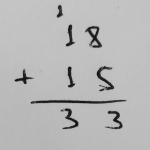

In [59]:
img

In [60]:
img = ToTensor()(img)

In [61]:
#beam_size é um parâmetro que variamos com optuna: pode ser 10 (default) ou 5
beam_size = 10

#max_len e alpha a gente não mexe: usamos esses valores fixos
max_len = 200
alpha = 1.0

mask = torch.zeros_like(img, dtype=torch.bool)#repare aqui que eu troquei para bool (comparei com o do CoMER e com a funcao collate_fn em datamodule.py)
hyps = model.bttr.beam_search(img.unsqueeze(0), mask, beam_size, max_len)
best_hyp = max(hyps, key=lambda h: h.score / (len(h) ** alpha))
hyp = vocab.indices2label(best_hyp.seq)

c:\Users\01011000\AppData\Local\anaconda3\envs\SAN\lib\site-packages\torch\nn\functional.py:4999: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


In [62]:
#Isso aqui dá erro. A célula de cima é o ajuste para rodar
hyp = model.beam_search(img)

AssertionError: only bool and floating types of key_padding_mask are supported

In [63]:
print(hyp)

\overset { 1 } { 1 } 8 + 1 5 = 3 3
